In [1]:
# BASE_DIR = "//sum-lpnc-nas.u-ga.fr/SecureVault/LPNC-SecureVault/MEGAGING/Processed/osl_processing"
BASE_DIR = "/run/user/1001/gvfs/smb-share:server=sum-lpnc-nas.u-ga.fr,share=securevault/LPNC-SecureVault/MEGAGING/Processed/osl_processing"

run 1 missing
run 2 missing
run 3 missing
run 4 missing
run 1 missing
run 2 missing
run 3 missing
run 4 missing
run 1 missing
run 2 missing
run 3 missing
run 4 missing
run 1: 14321.478515625
run 2: 14330.3037109375
run 3: 14322.859375
run 4: 14328.796875

best mode: 3 
best run: 1 
with free energy: 14321.479


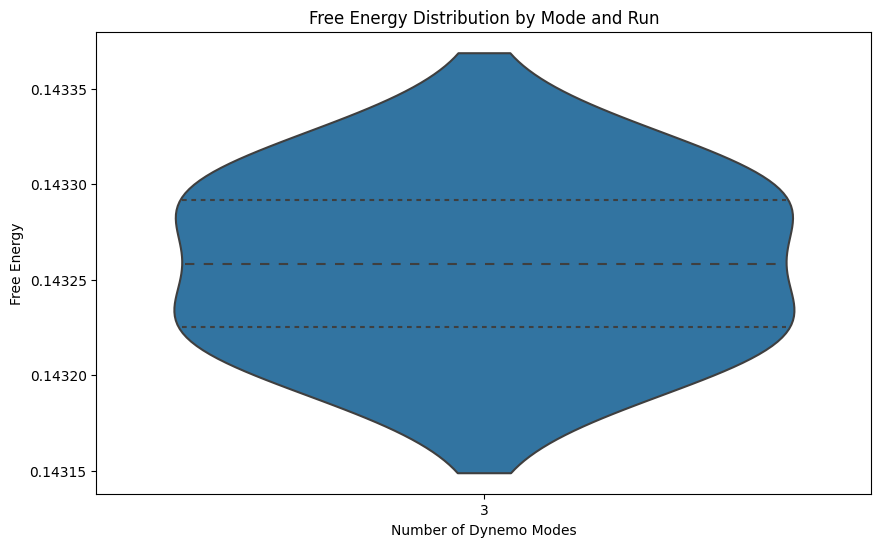

In [5]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

free_energy_data = {
    'mode': [],
    'run': [],
    'free_energy': []
}

best_free_energy = np.Inf
best_mode = None
best_run = None

for n_modes in range(7):
    for run in range(1, 5):
        MODEL_DIR = f"{BASE_DIR}/train_dynemo_1_90/{n_modes:02d}_modes/run{run:02d}/model"
        try:
            history = pickle.load(
                open(f"{MODEL_DIR}/history.pkl", "rb")
            )
            free_energy = history["free_energy"]
            print(f"run {run}: {free_energy}")

            free_energy_data['mode'].append(n_modes)
            free_energy_data['run'].append(run)
            free_energy_data['free_energy'].append(free_energy/1e5)

            if free_energy < best_free_energy:
                best_run = run
                best_free_energy = free_energy
                best_mode = n_modes
        except:
            print(f"run {run} missing")

print()
print("best mode:", best_mode, 
      "\nbest run:", best_run, 
      "\nwith free energy:", best_free_energy)

df = pd.DataFrame(free_energy_data)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='mode', y='free_energy', data=df, inner='quartile')
plt.title('Free Energy Distribution by Mode and Run')
plt.xlabel('Number of Dynemo Modes')
plt.ylabel('Free Energy')
plt.show()